In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('grayscale')

In [2]:
picture_size = [8, 8]
standards_count = 9

In [3]:
standards = pd.read_excel('data2.xlsx', usecols="B:I", names=range(picture_size[1]), nrows=picture_size[0]*standards_count)
test = pd.read_excel('data2.xlsx', usecols="B:I", names=range(picture_size[1]), skiprows=picture_size[0]*standards_count)

In [4]:
standarts = [0] * standards_count
for i in range(standards_count):
    standarts[i] = standards.iloc[i*picture_size[0]:(i+1)*picture_size[0]]

In [5]:
test_plot = np.array(test)
test_plot

array([[-1, -1,  1,  1,  1, -1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1,  1,  1,  1,  1, -1, -1]])

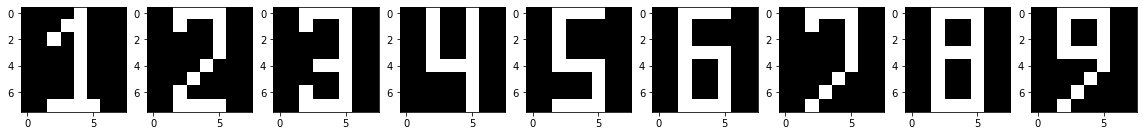

In [6]:
fig, ax = plt.subplots(1, standards_count, figsize=(20,20))
i = 0
for standart in standarts:
    ax[i].imshow(standart)
    i += 1
plt.show()

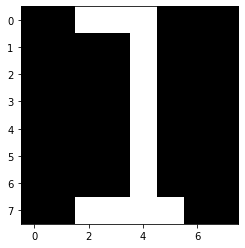

In [7]:
plt.imshow(test_plot)

In [8]:
def comparison(previous_y, new_y, eps):
    dif = 0
    for i in range(len(previous_y)):
        dif += math.pow(previous_y[i] - new_y[i], 2)
    if math.pow(dif, 1 / 2) < eps:
        return False
    else:
        return True

In [9]:
def to_vec(matrix):
    matrix = matrix.values
    vector=[]
    for i in range(len(matrix)):
        vector+=list(matrix[i])
    return vector

In [10]:
def to_matrix(previous_y):
    return np.array(previous_y).reshape((-1,8))

In [11]:
def first_layer(weights, input_vector):
    s_without_t = weights.T.dot(input_vector)
    t = [picture_size[0]*picture_size[1]//2] * standards_count
    s_with_t = s_without_t + t
    return s_with_t

In [12]:
def second_layer(previous_y, eps=0.1):
    output = []
    for j in range(standards_count):
        value = previous_y[j]
        other_y = 0
        for i in range(standards_count):
            if i != j:
                other_y += previous_y[i]
        value = value - eps * other_y
        if value >= 0:
            output.append(value)
        else:
            output.append(0)
    return output

In [13]:
weights = np.zeros((picture_size[0]*picture_size[1], standards_count))
for i in range(picture_size[0]*picture_size[1]):
    for j in range(standards_count):
        weights[i][j] = standards.at[(i // 8) + j*8, i % 8] / 2

In [14]:
test_vec = to_vec(test)
previous_y = first_layer(weights, test_vec)
flag = True
count = 0
while flag:
    new_y = second_layer(previous_y, eps=0.01)
    flag = comparison(previous_y, new_y, eps=0.1)
    previous_y = new_y
    count += 1
    print(f"Количество итераций: {count}")
    if count > 10000:
        break
print(previous_y)

Количество итераций: 1
Количество итераций: 2
Количество итераций: 3
Количество итераций: 4
Количество итераций: 5
Количество итераций: 6
Количество итераций: 7
Количество итераций: 8
Количество итераций: 9
Количество итераций: 10
Количество итераций: 11
Количество итераций: 12
Количество итераций: 13
Количество итераций: 14
Количество итераций: 15
Количество итераций: 16
Количество итераций: 17
Количество итераций: 18
Количество итераций: 19
Количество итераций: 20
Количество итераций: 21
Количество итераций: 22
Количество итераций: 23
Количество итераций: 24
Количество итераций: 25
Количество итераций: 26
Количество итераций: 27
Количество итераций: 28
Количество итераций: 29
Количество итераций: 30
Количество итераций: 31
Количество итераций: 32
Количество итераций: 33
Количество итераций: 34
Количество итераций: 35
Количество итераций: 36
Количество итераций: 37
Количество итераций: 38
Количество итераций: 39
Количество итераций: 40
Количество итераций: 41
Количество итераций: 42
К

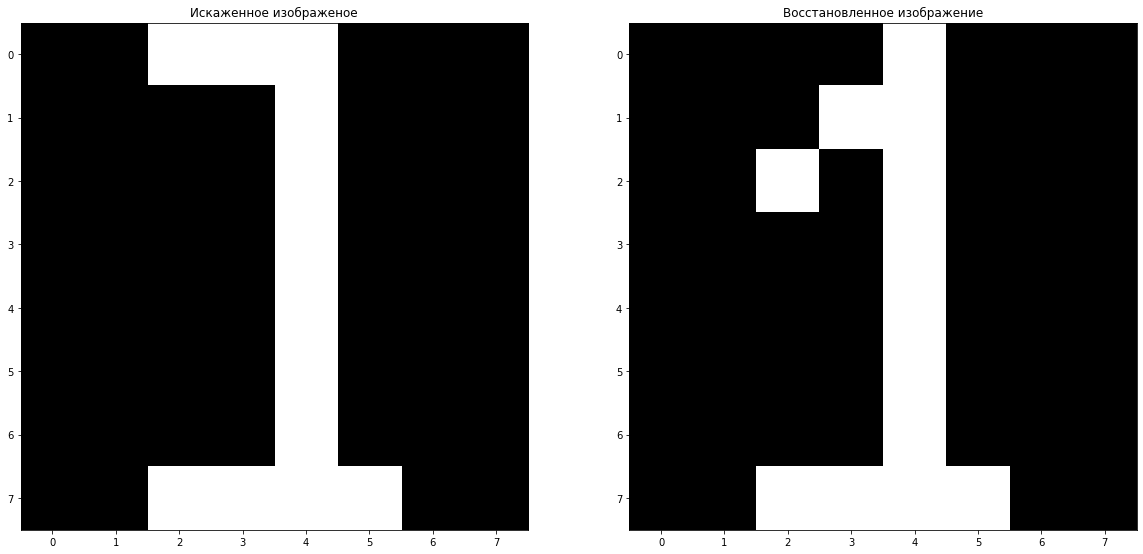

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))
ax[0].set_title('Искаженное изображеное')
ax[0].imshow(test_plot)
ax[1].set_title('Восстановленное изображение')
ax[1].imshow(standarts[np.argmax(previous_y)])
